# Nonlinear simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from epistasis.simulate import NonlinearSimulation

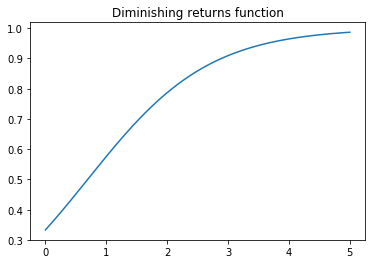

In [2]:
# Define some nonlinear function
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x))  

x = np.linspace(0,5, 1000)
y = diminishing_returns(x, 2)
plt.plot(x, y)
plt.title("Diminishing returns function")
plt.show()

In [3]:
# Define the wildtype/ancestor of 
# the genotype-phenotype map.
wildtype = "0000"
mutations = {
    0: ["0","1"],
    1: ["0","1"],
    2: ["0","1"],
    3: ["0","1"]
}

# Initialize the simulation.
# The simulation takes the nonlinear function as an argument
# and the p0 takes values for any extra parametes in the function.

sim = NonlinearSimulation(wildtype, mutations, 
    function=diminishing_returns, 
    p0=[2], 
    model_type="local")

# Set the epistatis coefficients
sim.set_coefs_order(2)
sim.set_coefs_random((-.1,2))

In [4]:
sim.epistasis.values

0     1.338229
1     0.960179
2     1.257494
3     0.599774
4     0.433272
5    -0.047582
6     0.080350
7     0.346354
8     1.981023
9     1.603164
10    0.044281
dtype: float64

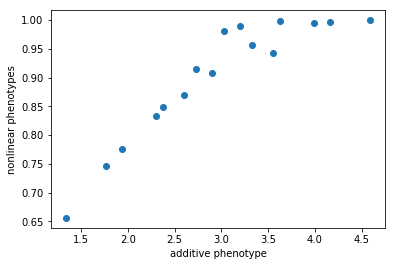

In [5]:
plt.plot(sim.p_additive, sim.phenotypes, 'o')
plt.xlabel("additive phenotype")
plt.ylabel("nonlinear phenotypes")
plt.show()

In [17]:
sim.to_json("../data/nonlinear-epistasis-dataset.json")